### INF 385: Lecture 5
#### more supervised learning.

In [34]:
# hide warnings to keep things tidy.
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC # SVM 
from sklearn.ensemble import RandomForestClassifier # random forests!
from sklearn import metrics

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline  
matplotlib.style.use('ggplot') # make things a bit prettier.

# note that I am importing the data science code from our text (Joel Grus), 
# available at: https://github.com/joelgrus/data-science-from-scratch/
import sys
# this points to the directory with all modules from the textbook.
sys.path.append("../../data-science-from-scratch/code-python3/")
import nearest_neighbors

In [7]:
###
# note: some of the following borrowed from:
# http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html
###

iris = datasets.load_iris() # our old friend iris
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y) # three labels

array([0, 1, 2])

In [8]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]

#### k-NN

In [27]:
# Create and fit a nearest-neighbor classifier
# try to mess with the n_neighbors param!
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(iris_X_train, iris_y_train) 
y_hat = knn.predict(iris_X_test)
print(metrics.accuracy_score(iris_y_test, y_hat))

0.9


now, Joel's implementation (from scratch)

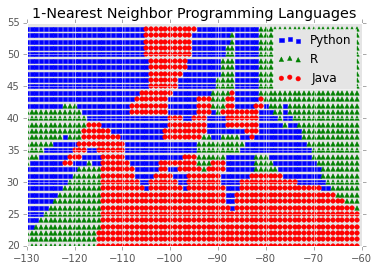

In [43]:
cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]
# play with 1 a bit
nearest_neighbors.classify_and_plot_grid(k=1)

Note that there are *lots* parameters you can set in kNN (and most learning algos in sklearn). Be sure to experiment and read doc!

In [10]:
?KNeighborsClassifier

#### SVM: see also separate SVM notebook!

In [15]:
svm = SVC(kernel="linear")
svm.fit(iris_X_train, iris_y_train) 
y_hat = svm.predict(iris_X_test)
print(metrics.accuracy_score(iris_y_test, y_hat))

0.9


#### For multi-layer Perceptron, see theano code example!

### Random forests: see also separate random forests notebook

In [32]:
rf = RandomForestClassifier()
rf.fit(iris_X_train, iris_y_train) 
y_hat = rf.predict(iris_X_test)
print(metrics.accuracy_score(iris_y_test, y_hat))

0.9


## Mini in-class Kaggle!
### OK, let's get you started w/the "digits" dataset

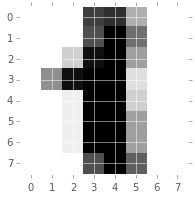

In [35]:
digits = sklearn.datasets.load_digits()
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [90]:
print(digits["DESCR"])

 Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is 

In [40]:
###
# train/test split! DO NOT LOOK @ TESTING DATA DURING MODEL DEV
X, y = digits.data, digits.target
X_train, y_train = X[:1000], y[:1000]
X_test, y_test   = X[1000:], y[1000:]